Interacting Proteins

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [15]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [17]:
c = cptac.Brca()

In [18]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [19]:
gene = 'PTEN'

In [22]:
mut_type_gbm = c.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = c.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = ip)
prot_and_mutations = c.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)
prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop duplicated columns
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
del_wt = merged[get]
del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 382)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CSNK2A1, MDM2, PIK3R3 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 113 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: Due to dropping the specified levels, dataframe now has 2 duplicated column headers. (C:\Users\brittany henderson\Anaconda3\env

Wildtype_Tumor    80
Deletion          24
Name: Mutation, dtype: int64

In [21]:
cols = list(del_wt.columns[:-1])

u.wrap_ttest(del_wt, 'Mutation', cols, return_all = True)

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


,Comparison,P_Value
0,PTEN_proteomics,0.000004
1,SHC1_proteomics,0.014172
2,EGFR_proteomics,0.016614
3,TP53_proteomics,0.068427
4,PIK3R1_proteomics,0.164475
5,MAST2_proteomics,0.213636
6,CSNK2A2_proteomics,0.262209
7,INPP4B_proteomics,0.295970
8,USP13_proteomics,0.325600
9,PTK2_proteomics,0.353546


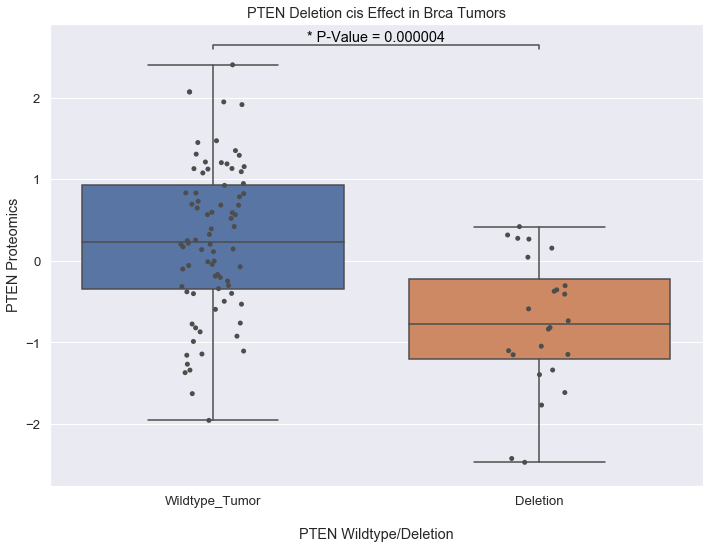

In [9]:
#cis
gene = 'PTEN'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Brca Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Proteomics')

format_pval_annotation('* P-Value = 0.000004', 0, 1, 2.6)

plt.show()
plt.clf()
plt.close()

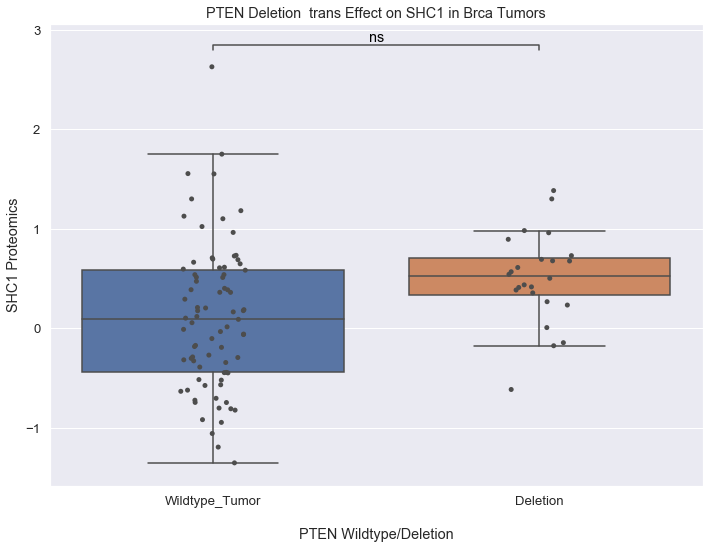

In [10]:
#trans
g = 'SHC1'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Brca Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, 2.8)

plt.show()
plt.clf()
plt.close()

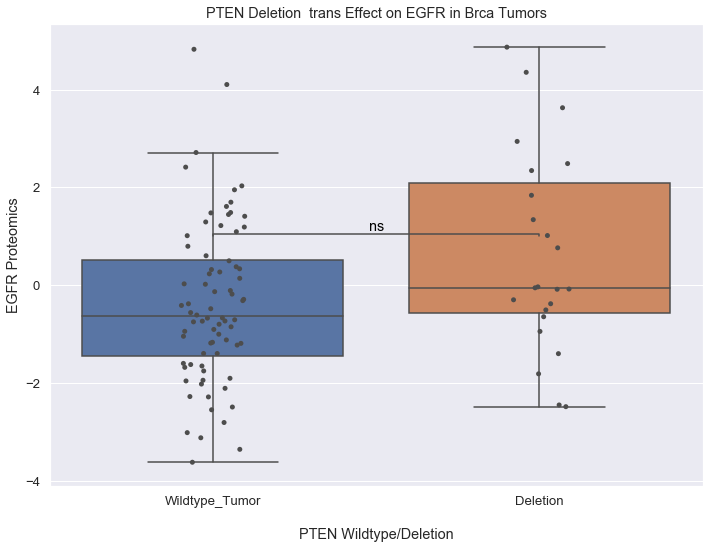

In [11]:
#trans
g = 'EGFR'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_proteomics", data = del_wt,
                      order = ["Wildtype_Tumor", "Deletion"], showfliers = False)    
boxplot.set_title('PTEN Deletion  trans Effect on '+g+' in Brca Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_proteomics", data = del_wt, jitter = True, 
                           color = ".3", order = ["Wildtype_Tumor", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Proteomics')

format_pval_annotation('ns', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

In [13]:
d = del_wt[del_wt.Mutation == "Deletion"]
wt = del_wt[del_wt.Mutation == "Wildtype_Tumor"]
del_med = d.median()
wt_med = wt.median()

d = {}

for prot in ip:
    dif = wt_med[prot+'_proteomics'] - del_med[prot+'_proteomics']
    d[prot] = dif
    print(wt_med[prot+'_proteomics'], '-', del_med[prot+'_proteomics'], '=',dif)

df = pd.DataFrame.from_dict(d, orient='index', columns=['Brca'])
df

nan - nan = nan
nan - nan = nan
0.327 - 0.36805 = -0.041049999999999975
0.23705 - 0.23595 = 0.0011000000000000176
-0.01765 - 0.09725 = -0.1149
-0.263 - 0.018000000000000002 = -0.281
-0.357 - -0.72785 = 0.37085
nan - nan = nan
-0.37129999999999996 - -0.08860000000000001 = -0.28269999999999995
0.27185 - -0.0056500000000000005 = 0.27749999999999997
-3.33055 - -3.21955 = -0.11100000000000021
-0.6415500000000001 - -0.0551 = -0.58645
0.1078 - 0.1232 = -0.015399999999999997
0.20265 - 0.15365 = 0.04899999999999999
0.19140000000000001 - 0.048350000000000004 = 0.14305
0.17875000000000002 - 0.32915 = -0.15039999999999998
0.2323 - -0.7757000000000001 = 1.008
0.1254 - 0.09965 = 0.02575000000000001
0.1853 - -0.11175000000000002 = 0.29705000000000004
-0.2942 - -0.14405 = -0.15015
0.1985 - 0.20545 = -0.006949999999999984
0.09655 - 0.52275 = -0.4262
0.3201 - -0.1656 = 0.4857
0.54315 - 0.16620000000000001 = 0.37695
0.0986 - -0.033249999999999995 = 0.13185
0.54515 - 0.5560499999999999 = -0.01089999999999

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Brca
MDM2,NaN
CSNK2A1,NaN
PDGFRB,-0.04105
PIK3R2,0.00110
PIK3C3,-0.11490
CSNK2A2,-0.28100
SLC9A3R1,0.37085
PIK3R3,NaN
USP13,-0.28270
PIK3CA,0.27750
